<a href="https://colab.research.google.com/github/Korsholm22/M4_Group_Assignments/blob/main/Group_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK**
- Build, train, and evaluate a neural network with Pytorch.
- It should have minimum 2 hidden layers
- Experiment with at least 5 different variations of hyperparameters (n layers / neurons, activation function, epochs, optimizers, learning rate etc.).
- Use gradio to build a simple interactive demo (in the notebook).

This should include:

1. Feature selection
2. Feature engineering (if necessary)
3. Standard ML preprocessing (if necessary)
4. Train-test split.
5. Defining a neural network architecture in putorch
6. Define a training loop.
7. training the model.
8. Try out different hyperparameters.
9. Evaluate the final model on the test data.
10. Visualize results with Grad.io

# Imports

In [1]:
# Pip installs
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Importing libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.preprocessing import StandardScaler
import gradio as gr

In [3]:
# Importing dataset from M1 (SML APPLICATIONS - AIRBNB PRICING)
data = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-06-24/data/listings.csv.gz')

In [4]:
# Examining the dataset
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220624204326,2022-06-25,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,https://www.airbnb.com/users/show/16774,...,4.89,4.72,4.70,NaN,f,1,1,0,0,1.10
1,26057,https://www.airbnb.com/rooms/26057,20220624204326,2022-06-25,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,https://www.airbnb.com/users/show/109777,...,4.85,4.94,4.81,NaN,f,1,1,0,0,0.56
2,26473,https://www.airbnb.com/rooms/26473,20220624204326,2022-06-25,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,https://www.airbnb.com/users/show/112210,...,4.69,4.88,4.60,NaN,f,11,6,5,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220624204326,2022-06-25,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,https://www.airbnb.com/users/show/125230,...,5.00,4.85,4.77,NaN,f,1,1,0,0,0.15
4,670820,https://www.airbnb.com/rooms/670820,20220624204326,2022-06-25,1 Bedroom Apartment 5 min to Centre,The flat is located close to the city center -...,The flat is surrounded by parks and streets th...,https://a0.muscache.com/pictures/91442571/8563...,1566921,https://www.airbnb.com/users/show/1566921,...,4.88,4.88,4.25,NaN,f,1,1,0,0,0.10


# Preprocessing

In [5]:
# Converting price from an object to a float
data['price'] = data.price.str.replace('$','')
data['price'] = data.price.str.replace(',','')
data['price'] = data['price'].astype('float')

<ipython-input-5-90af22cc24d0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data.price.str.replace('$','')


In [6]:
# Converting instant_bookable from an object to a boolean
mapping = {'f':False,'t':True}
data.replace({"instant_bookable":mapping}, inplace=True)

In [7]:
# Keeping only airbnb's where the standard deviation of price is less than 2
data['price_z'] = (data['price'] - data['price'].mean())/data['price'].std(ddof=0)
data['price_z'] = data['price_z'].abs()
data = data[data.price_z < 2]

In [8]:
# Keeping only airbnb's which have received 1 or more reviews in the last 30 days
# Keeping only airbnb's which have a review score rating of 4 or more
data = data[data.number_of_reviews_l30d >= 1]
data = data[data.review_scores_rating >= 4]

In [9]:
# Seleting features from the dataset to be used as inputs and output in the neural network
selected_df = data[['instant_bookable','accommodates', 'beds', 'minimum_nights_avg_ntm', 'price']]

In [10]:
# Dropping NaN values
selected_df = selected_df.dropna()

In [11]:
# Defining X
X = selected_df.iloc[:,:-1]

In [12]:
# Defining y
y = selected_df.price

In [13]:
# Scaling numerical values by instantiating the scaler, fitting it onto X and inserting the scaled values in X
scaler = StandardScaler()
transformed_nummerical = scaler.fit_transform(X)
X.iloc[:,0:] = transformed_nummerical

In [14]:
# Splitting the data intro train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Converting the training and test sets to tensors

# Training sets
X_train = torch.tensor(X_train[['instant_bookable', 'accommodates', 'beds', 'minimum_nights_avg_ntm']].values.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32))

# Test sets
X_test = torch.tensor(X_test[['instant_bookable', 'accommodates', 'beds', 'minimum_nights_avg_ntm']].values.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.float32))

In [16]:
# Examining the size of the tensors
print('Training sets:')
print(X_train.size())
print(y_train.size())

print('')

print('Test sets:')
print(X_test.size())
print(y_test.size())

Training sets:
torch.Size([3170, 4])
torch.Size([3170])

Test sets:
torch.Size([793, 4])
torch.Size([793])


# Default Network

First, we copy/paste example 5 from 'Exercise Session 1 ANN Pytorch Solution: 5. Training ANN through Customer churn dataset with 4 inputs and 2 hidden layers' as a default model for further experimentation with hyperparameters.

Based on these hyperparameters the minimal loss is: 1,901,382.375

In [17]:
epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
default = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(default.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = default.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-17-2cba45d1cd84>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 1901385.375
Loss: 1901382.375
Loss: 1901382.375
Loss: 1901382.375
Loss: 1901382.375


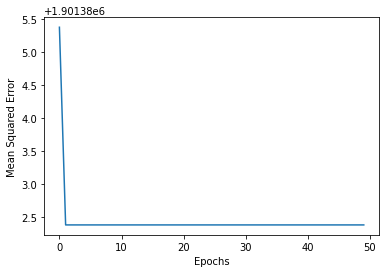

In [18]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# Experiments

Based on the following overview, we may experiment with different loss functions, optimization algorithms, activation functions, number of hidden layers, number of epochs and learning rates depending on the type of neural network and the problem being solved.

![](https://raw.github.com/Korsholm22/M4_Group_Assignments/main/Illustrations/Neural%20Network%20Overview.jpg)

## Experiment 1: Activation Function

Since we are working with a regression problem (pricing of airbnb's), we change the activation function of the output layer to Identity according to the overview above.

Based on these hyperparameters the minimal loss is: 329,386.71875

Changes compared to default network:

- Output layer activation function changed to Identity

In [19]:
epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
experiment_1 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Identity()
                         );
optimizer = torch.optim.RMSprop(experiment_1.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = experiment_1.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-19-59c4e6ab0def>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 1833482.5
Loss: 329641.4375
Loss: 329387.375
Loss: 329386.71875
Loss: 329408.4375


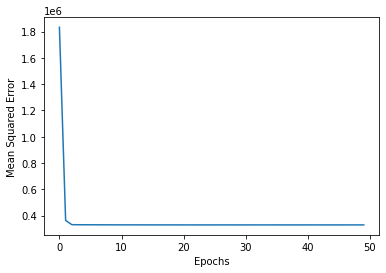

In [20]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## Experiment 2: Loss Function

Since we are working with a regression problem, we can also use the loss function L1 for evaluating the network.

Based on these hyperparameters the minimal loss is: 397.4676513671875


Changes compared to default network:

- Output layer activation function changed to Identity
- Loss function changed to L1 Loss

In [40]:
epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
experiment_2 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Identity()
                         );
optimizer = torch.optim.RMSprop(experiment_2.parameters(), lr=learning_rate)
loss_l1 = torch.nn.L1Loss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = experiment_2.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_l1(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-40-9bff6d51a451>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 438.8094787597656
Loss: 398.581787109375
Loss: 397.74591064453125
Loss: 397.7081298828125
Loss: 397.4676513671875


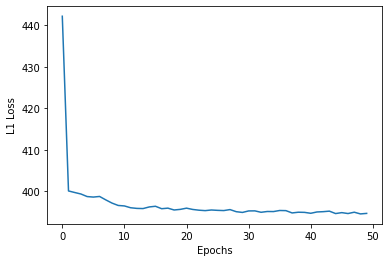

In [22]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

## Experiment 3: Hidden Layers

Increasing the number of hidden layers in the network may improve performance depending on the complexity of the problem being solved. We therefore try to increase the number of hidden layers from 2 to 3.

Based on these hyperparameters the minimal loss is: 396.3428649902344

Changes compared to default network:

- Output layer activation function changed to Identity
- Loss function changed to L1 Loss
- Number of hidden layers increased from 2 to 3

In [23]:
epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
experiment_3 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,8),
                         torch.nn.ReLU(),
                         torch.nn.Linear(8,1),
                         torch.nn.Identity()
                         );
optimizer = torch.optim.RMSprop(experiment_3.parameters(), lr=learning_rate)
loss_l1 = torch.nn.L1Loss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = experiment_3.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_l1(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-23-29e376988c95>:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 421.0357360839844
Loss: 400.3419494628906
Loss: 398.9405212402344
Loss: 397.2891540527344
Loss: 396.3428649902344


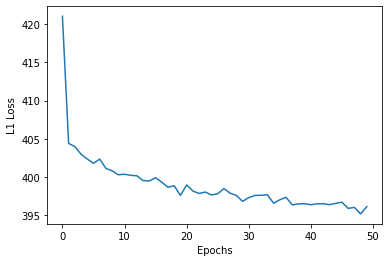

In [24]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

## Experiment 4: Epochs

The number of epochs determines how many times the weights of the network are changed and the boundary goes from underfitting to optimal to overfitting. We therefore try to increase the number of epochs from 50 to 100.

Based on these hyperparameters the minimal loss is: 391.3650207519531


Changes compared to default network:

- Output layer activation function changed to Identity
- Loss function changed to L1 Loss
- Number of hidden layers increased from 2 to 3
- Number of epochs increased from 50 to 150


In [25]:
epochs = 150
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
experiment_4 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,8),
                         torch.nn.ReLU(),
                         torch.nn.Linear(8,1),
                         torch.nn.Identity()
                         );
optimizer = torch.optim.RMSprop(experiment_4.parameters(), lr=learning_rate)
loss_l1 = torch.nn.L1Loss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = experiment_4.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_l1(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-25-fd571ffeed3d>:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/150 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 418.6780700683594
Loss: 401.4540710449219
Loss: 400.1495666503906
Loss: 399.65008544921875
Loss: 398.3292541503906
Loss: 395.9892883300781
Loss: 394.47723388671875
Loss: 393.1593933105469
Loss: 393.2121887207031
Loss: 391.8857727050781
Loss: 391.3650207519531
Loss: 392.9065856933594
Loss: 392.703857421875
Loss: 392.2646789550781
Loss: 392.9762268066406


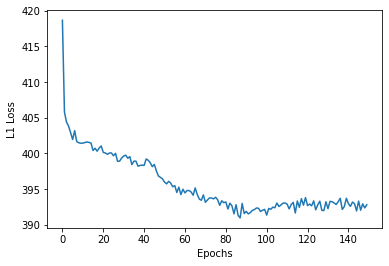

In [26]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

## Experiment 5: Learning Rate

The learning rate controls how much the model is changed in response to the estimated error each time the model weights are updated. A rate too small may result in a long training process while a rate too large may result in a sub-optimal set of weights or an unstable training process. We therefore try to decrease the learning rate from 0.01 to 0.001

Based on these hyperparameters the minimal loss is: 389.62481689453125

Changes compared to default network:

- Output layer activation function changed to Identity
- Loss function changed to L1 Loss
- Number of hidden layers increased from 2 to 3
- Number of epochs increased rom 50 to 150
- Learning rate decreased from 0.01 to 0.001


In [27]:
epochs = 150
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
experiment_5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,8),
                         torch.nn.ReLU(),
                         torch.nn.Linear(8,1),
                         torch.nn.Identity()
                         );
optimizer = torch.optim.RMSprop(experiment_5.parameters(), lr=learning_rate)
loss_l1 = torch.nn.L1Loss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = experiment_5.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_l1(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-27-29ac3d128a81>:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/150 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 840.4163818359375
Loss: 394.5738830566406
Loss: 393.3780822753906
Loss: 392.5062255859375
Loss: 392.04156494140625
Loss: 391.7867126464844
Loss: 391.4779968261719
Loss: 391.3907775878906
Loss: 391.08453369140625
Loss: 390.80023193359375
Loss: 390.52227783203125
Loss: 390.4826354980469
Loss: 390.0816345214844
Loss: 389.833251953125
Loss: 389.62481689453125


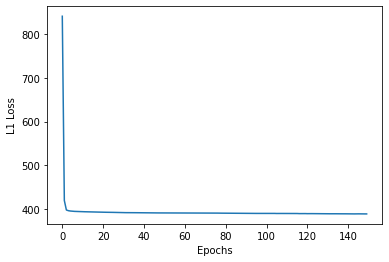

In [28]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

## Experiment 6: Loss Function

Seeing how the number of hidden layers, number of epochs and learning rate affect the loss function in experiment 2-5 above, which all used L1 Loss for evaluating the network, we try to change the loss function back to MSE to examine if these changes have the same effect when using this loss function for network evaluation.

Based on these hyperparameters the minimal loss is: 328,019.75

Changes compared to default network:

- Output layer activation function changed to Identity
- Loss function changed back to MSE Loss
- Number of hidden layers increased from 2 to 3
- Number of epochs increased rom 50 to 150
- Learning rate decreased from 0.01 to 0.001


In [29]:
epochs = 150
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
experiment_6 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,8),
                         torch.nn.ReLU(),
                         torch.nn.Linear(8,1),
                         torch.nn.Identity()
                         );
optimizer = torch.optim.RMSprop(experiment_6.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = experiment_6.forward(x.float())

          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()

          # 4. Back Propagation
          optimizer.step()

          # Display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-29-a190c4754df3>:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/150 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 1182468.0
Loss: 329101.0
Loss: 328499.03125
Loss: 328318.6875
Loss: 328256.8125
Loss: 328214.71875
Loss: 328163.34375
Loss: 328139.71875
Loss: 328119.0625
Loss: 328097.4375
Loss: 328079.40625
Loss: 328068.9375
Loss: 328050.40625
Loss: 328038.75
Loss: 328019.75


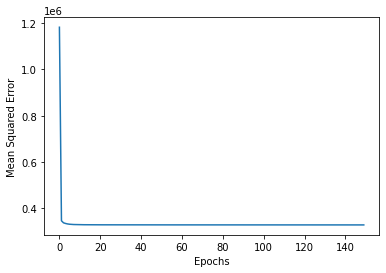

In [30]:
# Plotting the loss function
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# Evaluating the Models on Test Data

In [41]:
# Saving the trained models
torch.save(default, 'default_model.pkl')
torch.save(experiment_1, 'experiment_1_model.pkl')
torch.save(experiment_2, 'experiment_2_model.pkl')
torch.save(experiment_3, 'experiment_3_model.pkl')
torch.save(experiment_4, 'experiment_4_model.pkl')
torch.save(experiment_5, 'experiment_5_model.pkl')
torch.save(experiment_6, 'experiment_6_model.pkl')

In [42]:
# Loading the models
default_model = torch.load('default_model.pkl')
experiment_1_model = torch.load('experiment_1_model.pkl')
experiment_2_model = torch.load('experiment_2_model.pkl')
experiment_3_model = torch.load('experiment_3_model.pkl')
experiment_4_model = torch.load('experiment_4_model.pkl')
experiment_5_model = torch.load('experiment_5_model.pkl')
experiment_6_model = torch.load('experiment_6_model.pkl')

In [43]:
# Applying the models to test data
default_test = default_model(X_test)
experiment_1_test = experiment_1_model(X_test)
experiment_2_test = experiment_2_model(X_test)
experiment_3_test = experiment_3_model(X_test)
experiment_4_test = experiment_4_model(X_test)
experiment_5_test = experiment_5_model(X_test)
experiment_6_test = experiment_6_model(X_test)

In [44]:
# Converting y_test and results on test data to lists in order to calculate R^2 and MSE
y_test_list = y_test.detach().numpy()

default_list = default_test.detach().numpy()
experiment_1_list = experiment_1_test.detach().numpy()
experiment_2_list = experiment_2_test.detach().numpy()
experiment_3_list = experiment_3_test.detach().numpy()
experiment_4_list = experiment_4_test.detach().numpy()
experiment_5_list = experiment_5_test.detach().numpy()
experiment_6_list = experiment_6_test.detach().numpy()

In [45]:
# Calculating R^2 for each model
print('default_r2: ' + str(r2_score(y_test_list, default_list)))
print('experiment_1_r2: ' + str(r2_score(y_test_list, experiment_1_list)))
print('experiment_2_r2: ' + str(r2_score(y_test_list, experiment_2_list)))
print('experiment_3_r2: ' + str(r2_score(y_test_list, experiment_3_list)))
print('experiment_4_r2: ' + str(r2_score(y_test_list, experiment_4_list)))
print('experiment_5_r2: ' + str(r2_score(y_test_list, experiment_5_list)))
print('experiment_6_r2: ' + str(r2_score(y_test_list, experiment_6_list)))

default_r2: -2.9839089766782068
experiment_1_r2: 0.3190276204390212
experiment_2_r2: 0.2638382191450589
experiment_3_r2: 0.2528750388950586
experiment_4_r2: 0.2743065688329773
experiment_5_r2: 0.30779062791258394
experiment_6_r2: 0.3188075242702413


In [46]:
# Calculating MSE for each model
print('default_mse: ' + str(mean_squared_error(y_test_list, default_list)))
print('experiment_1_mse: ' + str(mean_squared_error(y_test_list, experiment_1_list)))
print('experiment_2_mse: ' + str(mean_squared_error(y_test_list, experiment_2_list)))
print('experiment_3_mse: ' + str(mean_squared_error(y_test_list, experiment_3_list)))
print('experiment_4_mse: ' + str(mean_squared_error(y_test_list, experiment_4_list)))
print('experiment_5_mse: ' + str(mean_squared_error(y_test_list, experiment_5_list)))
print('experiment_6_mse: ' + str(mean_squared_error(y_test_list, experiment_6_list)))

default_mse: 1756780.5
experiment_1_mse: 300287.75
experiment_2_mse: 324624.56
experiment_3_mse: 329458.97
experiment_4_mse: 320008.34
experiment_5_mse: 305242.9
experiment_6_mse: 300384.8


# Gradio Demonstration

The best performing model from above is demonstrated using Gradio.

However, if wanted, the other models can be implemented in the prediction function to be demonstrated in Gradio as well.

## Defining the prediction function

In [47]:
# Defining the prediction function

# If wanting to demonstrate other models, change the model defined in line 6 to one of the following:
    # default_model
    # experiment_1_model
    # experiment_2_model
    # experiment_3_model
    # experiment_4_model
    # experiment_5_model
    # experiment_6_model

def predict(instant_bookable, accommodates, beds, minimum_nights_avg_ntm):
  df = pd.DataFrame({'instant_bookable': instant_bookable, 'accommodates': accommodates, 'beds': beds, 'minimum_nights_avg_ntm': minimum_nights_avg_ntm}, index=[0])
  df_scaled = scaler.transform(df)
  df.iloc[:,0:] = df_scaled
  input = torch.tensor(df[['instant_bookable', 'accommodates', 'beds', 'minimum_nights_avg_ntm']].values.astype(np.float32))
  prediction = experiment_1_model(input) # Change model name here
  return prediction

## Creating the Gradio Interface

In [48]:
with gr.Blocks() as demo:
    gr.Markdown("""
    **💰 Airbnb Price Prediction with Pytorch 💰**""")
    gr.Markdown("""
    This demo uses Pytorch to predict the price of an Airbnb accommodation based on its bookability, number of people it accommodates, number of beds and minimum nights average. Simply put your information into the model and press the button to predict the price - Easy peasy lemon squeezy 🍋""")

    with gr.Row():
        with gr.Column():
            instant_bookable = gr.Dropdown(
                label="Instant Bookable",
                choices= [True, False]
            )
            accommodates = gr.Slider(
                label="Accomodates",
                minimum=1,
                maximum=20,
                step=1
            )
            beds = gr.Slider(
                label="Beds",
                minimum=1,
                maximum=20,
                step=1
            )
            minimum_nights_avg_ntm = gr.Slider(
                label="Minimum Nights Avg",
                minimum=1,
                maximum=31,
                step=1
            )
        with gr.Column():
            number = gr.Number()
            with gr.Row():
                predict_btn = gr.Button(value="Predict Airbnb Price 💰")
            predict_btn.click(
                predict,
                inputs=[
                    instant_bookable,
                    accommodates,
                    beds,
                    minimum_nights_avg_ntm,
                ],
                outputs=[number],
            )

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c33de952-572c-40da.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
